In [1]:
import re
import jieba
from wordcloud import WordCloud
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, timezone
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]

In [2]:
tempfile = pd.read_csv("sinaCLEANcontent.csv")

In [3]:
tempfile

,名字,url,内容0,时间0,转发0,评论0,点赞0,内容1,时间1,转发1,...,内容38,时间38,转发38,评论38,点赞38,内容39,时间39,转发39,评论39,点赞39
0,腾讯视频,https://weibo.com/ilovevideo,时代少年团超话 2035是这young 带着对2035年的期待 把奋斗当做信仰 一起书写未来...,2021-01-04 10:15,20017.0,1894.0,124353.0,敲娱的直播间 惊喜上线 小鹅邀你云看剧 @腾讯视频 独家直播 北京电影学院2017级 表演本...,2021-01-04 18:01,2634.0,...,谢允喂周翡吃糯米鸭 谢允@UNIQ 王一博 因为一只糯米鸭吃醋 认清了自己对周翡@赵丽颖 的...,2021-01-04 22:06,137.0,259.0,1615.0,宋茜超话 宋茜蛇尾眼妆 宋茜红秀封面 @宋茜 最新时尚大片造型 波纹黑发搭配蛇尾眼妆 凌冽的...,2021-01-04 13:08,64.0,186.0,1724.0
1,腾讯体育,https://weibo.com/tengxuntiyu,心疼小学生啊 库里狂砍26 8 5 梦幻脚步失衡倒地再现神仙球 真的竭尽全力了 无奈独木难支...,2021-01-02 14:42,65.0,326.0,9138.0,只打了5场比赛 勇士就应该选择摆烂吗 新赛季五场球 勇士分别大比分输给篮网 雄鹿和开拓者 只...,2021-01-02 17:03,8.0,...,你好 今天 WCBA诞生新王 内蒙古女篮总分2比0横扫新疆 夺得总冠军 每一个不曾起舞的日子...,2021-01-03 23:03,2.0,5.0,28.0,太暖了吧 36岁生日夜詹皇给小球迷送礼物 老詹场上场下都没得挑 这就是传奇 L腾讯体育的微博视频,2020-12-31 16:07,3.0,4.0,28.0
2,腾讯微信团队,https://weibo.com/weixinteam,微信表情更新了 微信上线裂开表情 打开下面6张灵魂小表情 猜猜分别代表什么意思 标准答案就在...,2020-11-18 18:17,7978.0,57773.0,312820.0,哇哥 举起你的右手 就能马上拥有,2020-11-19 07:57,189.0,...,黑龙江的好看里 必须有你一份,2021-01-01 17:29,9.0,77.0,60.0,NaN,NaN,NaN,NaN,NaN
3,腾讯综艺,https://weibo.com/remendezongyi,想知道你的爱豆是怎样的 明星综艺打工人 深井烧鹅 深井年度策划 第1弹 邀请@陈宥维 @高嘉...,2021-01-01 20:55,2078.0,795.0,27249.0,令人心动的offer 精彩抢先看 加油团内心恐惧大曝光 本期飞行嘉宾@硬糖少女303 希林娜...,2021-01-04 17:33,163.0,...,乔欣林允男女祝英台合照 @林允Jelly 网上发出自己和@乔欣Bridgette 的合照 照...,2021-01-03 22:08,140.0,149.0,215.0,蒋梦婕吴昕假发片社交 看来假发片已经成为了女艺人造型法宝了 @蒋梦婕 现场示范 丸子头秒变双...,2021-01-04 22:37,52.0,66.0,260.0
4,腾讯微视,https://weibo.com/u/6479255096,马嘉祺方律师声明 近日 有网友翻出 马嘉祺曾把邻居家的狗踩骨折 的采访 引发热议 刚刚 @时...,2021-01-03 18:44,2542.0,945.0,54369.0,小微爱豆生日会 秦霄贤0105生日快乐 秦霄贤超话 你是专业认真的相声演员 有着过人的相声功...,2021-01-03 20:49,873.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,腾讯公司,https://weibo.com/tencent,峨眉山年度短剧 枣知道 现正上映主演 世界遗产讲述人@秦昊 作者 @爱潜水的乌贼本尊导演 翁...,2020-12-29 16:30,9365.0,501.0,1386.0,大扎好 介四一款教大扎学普通话的船新游戏 挤需体验几番钟 里造会跟我一样 爱象缩普通话 不管...,2020-11-05 11:06,2676.0,...,微信发送原视频不压缩的方法 很简单 快找这位微信里的 文件快递员 L腾讯微信团队的微博视频,NaN,9.0,46.0,35.0,与这座城市共成长 一切自有答案 深圳有答案,NaN,7.0,19.0,58.0
6,腾讯新闻出品,https://weibo.com/tengxunxinwen,第二届腾讯新闻中国益公司责任力论坛 11月27日 陈数在这里等你,2020-11-17 13:32,3767.0,759.0,1052.0,她去过四川马尔康 青海湟中 青海玉树 内蒙古克什克腾旗 疫情期间倡导并捐赠 校园守护包 带给...,2020-11-17 11:27,2144.0,...,结婚一定要买房吗 未婚夫买不起房怎么办 女孩 感情最重要 租房也能结婚 苹果和悟空是苏州一对...,2020-11-09 15:49,2.0,1.0,1.0,向上之路 扎根沃土 向上而生,2020-10-29 16:47,1.0,0.0,2.0
7,腾讯动漫,https://weibo.com/u/5203786516,哇哦 小欧@网绿小欧 你的 OPPO Reno5 Pro有点东西 本鹅真的回归颜值巅峰啦 1...,2020-12-04 16:43,564.0,248.0,262.0,昨晚鹅娘在涂山过的平安夜 玩的很开心 顺便顺了两个 妖舞猫耳耳机 狐妖小红娘联名款 回来 还...,2020-12-25 14:23,512.0,...,鹅娘独家 一人之下 人有灵 潮流体验官谷蓝帝专访来袭 这次又能解锁什么小秘密呢 同时人有灵预...,2020-11-25 15:01,16.0,18.0,61.0,谷蓝帝超话 无界11月刊 一人之下人有灵 太潮了 一人之下 今天 无界快问快答为大家带来了一...,2020-11-25 14:01,19.0,24.0,50.0
8,腾讯新闻,https://weibo.com/u/2806170583,年终烟花秀 再见2020 你好2021 新年你想把美好的祝福送给谁 放烟花送祝福 更有百万红...,2020-12-31 19:21,12.0,121.0,1132.0,淮安市民跨年夜运河边自发放荷灯 不平凡的一年 祈福国泰民安 12月31日 江苏淮安 2020...,2021-01-01 13:00,5.0,...,提醒民众不要外出 纽约市长白思豪自己跑到时代广场跳舞了 近日 在美国 纽约市长告诫民众不要外...,2021-01-02 20:00,1.0,1.0,2.0,保时捷婚车上不去陡坡 网曝云南一婚车被众人拉着上陡坡 网友这样说 1月1日 网传云南昭通一保...,2021-01-02 19:00,1.0,1.0,2.0
9,腾讯娱乐,https://weibo.com/u/3182423937,2020 腾讯娱乐年度盛典 X 星指数年度荣誉冠军全部出炉他 她们是 星指数年度电视剧男演员...,2020-12-28 12:25,50713.0,15568.0,1161591.0,腾讯娱乐年度盛典阵容 歌手 当打之年 荣摘歌王桂冠 全新创作专辑 新世界NEW WORLD ...,2021-01-04 11:12,34544.0,...,2020 腾讯娱乐年度盛典 X 星指数年度艺能之星结果正式出炉 恭喜 王一博超话 获得星指数...,2020-12-28 15:19,47.0,130.0,936.0,江苏卫视跨年 @李宇春 作为历年江苏跨年零点倒计时的固定嘉宾来了 舞台忽然红红火火 小鹅也提...,2020-12-31 23:50,195.0,107.0,797.0


In [52]:
count = 0
for i in range(40):
    count = count + tempfile["点赞"+str(i)][0]
want = count //40
print(want)

7073.0


In [73]:
def average_twoV(tempfile):
    whatever = []
    for index,row in tempfile.iterrows():
        comCount = []
        thumCount = []
        for i in range(40):
            if pd.isnull(row["点赞"+str(i)]): continue
            comCount.append(row["点赞"+str(i)])
            if pd.isnull(row["转发"+str(i)]): continue
            thumCount.append(row["转发"+str(i)])
        if len(comCount) == 0 or len(thumCount) == 0: continue
        whatever.append([
            row["名字"],
            int(np.mean(comCount)),
            int(np.mean(thumCount))
        ])
    return(whatever)
        

In [75]:
average_2v = pd.DataFrame(average_twoV(tempfile),columns = ["名字","平均点赞","平均转发"])

In [112]:
average_2v.describe()

,平均点赞,平均转发
count,55.000000,55.000000
mean,2168.381818,270.890909
std,6984.485297,653.901444
min,0.000000,0.000000
25%,19.500000,9.500000
50%,89.000000,48.000000
75%,304.000000,247.000000
max,43216.000000,4171.000000


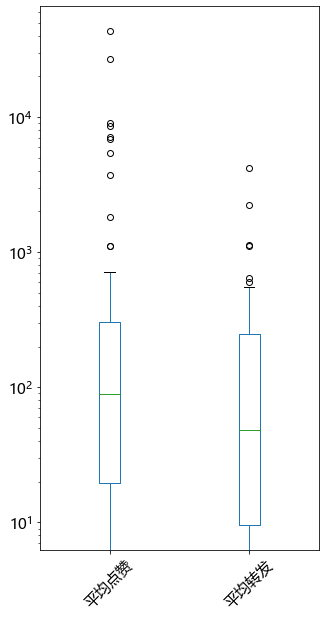

In [110]:
plt.figure(figsize=(5, 10))
average_2v.boxplot(grid=False, rot=45, fontsize=15)
plt.yscale("log")
plt.show()

In [88]:
average_2v.quantile([0.25, 0.75])

,平均点赞,平均转发
0.25,19.5,9.5
0.75,304.0,247.0


In [90]:
tmp = average_2v.quantile([0.25, 0.75]).to_numpy()

In [92]:
(tmp[1] - tmp[0]) * 1.5 + tmp[1]

array([730.75, 603.25])

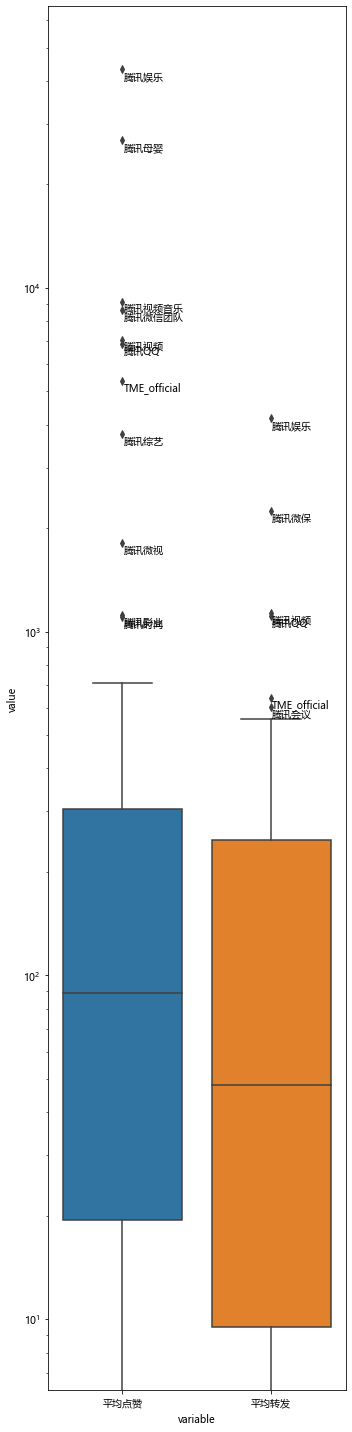

In [102]:
plt.figure(figsize=(5,20))
sns.boxplot(x="variable", y="value", data=pd.melt(average_2v[["平均点赞", "平均转发"]]))
average_2v_quantile = average_2v.quantile([0.25, 0.75]).to_numpy()
average_2v_maxoutlier = (average_2v_quantile[1]-average_2v_quantile[0])*1.5 + average_2v_quantile[1]
for index, row in average_2v.iterrows():
    if row["平均点赞"] > average_2v_maxoutlier[0]:
        plt.annotate(row["名字"], (0, row["平均点赞"]), (1, -1), va='top', textcoords='offset points')
    if row["平均转发"] > average_2v_maxoutlier[1]:
        plt.annotate(row["名字"], (1, row["平均转发"]), (1, -1), va='top', textcoords='offset points')
plt.yscale("log")
plt.tight_layout()
plt.show()

In [4]:
((datetime.now(timezone.utc) + timedelta(hours=8)).replace(tzinfo=None) - datetime.strptime(tempfile["时间0"][1], "%Y-%m-%d %H:%M")).days

2

In [5]:
def active_weeks(tempfile):
    weeks = [[],[],[]]
    for index,row in tempfile.iterrows():
        for i in range(40):
            timeRow = row["时间"+str(i)]
            if pd.isnull(timeRow): continue
            try:
                days = ((datetime.now(timezone.utc) + timedelta(hours=8)).replace(tzinfo=None) - datetime.strptime(timeRow, "%Y-%m-%d %H:%M")).days
            except Exception as e:
                print(e)
                continue
            if days <= 7:
                weeks[0].append((index, i))
            elif days <= 14:
                weeks[1].append((index,i))
            else:
                weeks[2].append((index,i))
    return weeks
                
                

In [6]:
unProcessed = active_weeks(tempfile)

In [7]:
unProcessed

[[(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10),
  (0, 11),
  (0, 12),
  (0, 13),
  (0, 14),
  (0, 15),
  (0, 16),
  (0, 17),
  (0, 18),
  (0, 19),
  (0, 20),
  (0, 21),
  (0, 22),
  (0, 23),
  (0, 24),
  (0, 25),
  (0, 26),
  (0, 27),
  (0, 28),
  (0, 29),
  (0, 30),
  (0, 31),
  (0, 32),
  (0, 33),
  (0, 34),
  (0, 35),
  (0, 36),
  (0, 37),
  (0, 38),
  (0, 39),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (1, 4),
  (1, 5),
  (1, 6),
  (1, 7),
  (1, 8),
  (1, 9),
  (1, 10),
  (1, 11),
  (1, 12),
  (1, 13),
  (1, 14),
  (1, 15),
  (1, 16),
  (1, 17),
  (1, 18),
  (1, 19),
  (1, 20),
  (1, 21),
  (1, 22),
  (1, 23),
  (1, 24),
  (1, 25),
  (1, 26),
  (1, 27),
  (1, 28),
  (1, 29),
  (1, 30),
  (1, 31),
  (1, 32),
  (1, 33),
  (1, 34),
  (1, 35),
  (1, 36),
  (1, 37),
  (1, 38),
  (1, 39),
  (2, 12),
  (2, 33),
  (2, 34),
  (2, 36),
  (2, 37),
  (2, 38),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3),
  (3, 4),
  (3, 5),
  (3, 6),
  (3

In [8]:
activeStats = []
for index, row in tempfile.iterrows():
    name = row["名字"]
    week1 = len([m for m in unProcessed[0] if m[0] == index])
    week2 = len([m for m in unProcessed[1] if m[0] == index])
    otherWeeks = len([m for m in unProcessed[2] if m[0] == index])
    activeStats.append([name,week1,week2,otherWeeks])
activeStats = pd.DataFrame(activeStats,columns = ["名字","week1","week2","otherWeeks"])


In [9]:
activeStats

,名字,week1,week2,otherWeeks
0,腾讯视频,40,0,0
1,腾讯体育,40,0,0
2,腾讯微信团队,6,4,21
3,腾讯综艺,40,0,0
4,腾讯微视,22,0,0
5,腾讯公司,2,0,22
6,腾讯新闻出品,5,1,34
7,腾讯动漫,0,3,37
8,腾讯新闻,40,0,0
9,腾讯娱乐,29,11,0


In [48]:
activeStats.describe()

,week1,week2,otherWeeks
count,58.000000,58.000000,58.000000
mean,7.931034,2.482759,17.689655
std,13.211986,3.885381,14.820809
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000
50%,1.500000,1.000000,20.000000
75%,6.000000,3.750000,30.000000
max,40.000000,22.000000,40.000000


In [10]:
activeStatsSorted = activeStats.sort_values(by="week1", ascending=True)

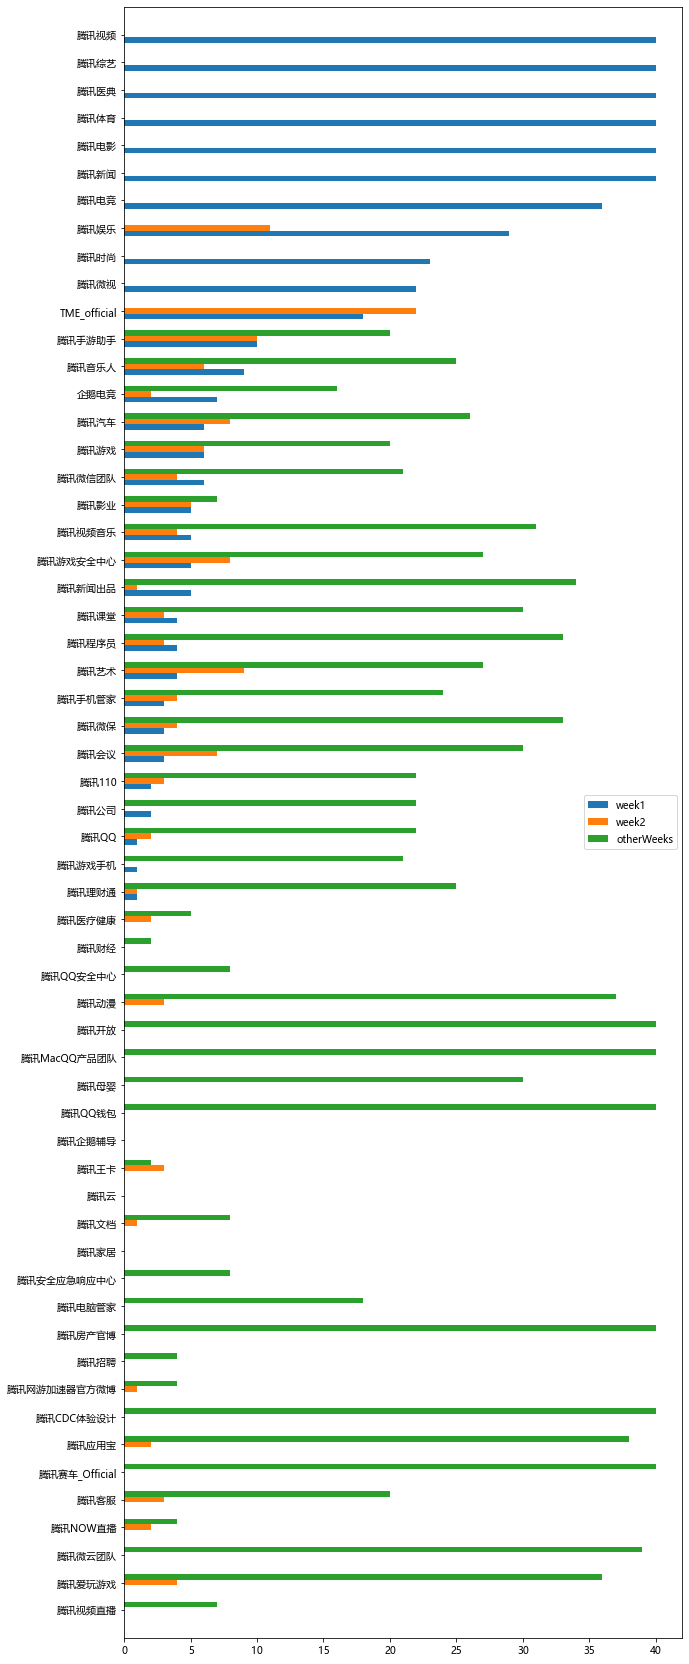

In [11]:
plt.figure(figsize=(10, 30))
pltPos = np.arange(len(activeStatsSorted))
pltWidth = 0.2
plt.barh(pltPos-pltWidth, activeStatsSorted["week1"], height=pltWidth, label="week1")
plt.barh(pltPos, activeStatsSorted["week2"], height=pltWidth, label="week2")
plt.barh(pltPos+pltWidth, activeStatsSorted["otherWeeks"], height=pltWidth, label="otherWeeks")
plt.yticks(pltPos, activeStatsSorted["名字"])
plt.ylim([np.min(pltPos)-1, np.max(pltPos)+1])
plt.legend(loc="best")
plt.savefig('test.jpg')  
plt.show()

In [12]:
data = []
for index,row in tempfile.iterrows():
    for i in range(40):
        time = row["时间"+str(i)]
        if pd.isnull(time): continue
        if not time[-5:-3]: continue
        time = int(time[-5:-3])
        reweibo = row["转发"+str(i)]
        comment = row["评论"+str(i)]
        thumb = row["点赞"+str(i)]
        if reweibo <1 or comment < 1 or thumb < 1: continue
        data.append([time,reweibo,comment,thumb])
data = pd.DataFrame(data,columns = ["时间","转发","评论","点赞"])

In [13]:
data

,时间,转发,评论,点赞
0,10,20017.0,1894.0,124353.0
1,18,2634.0,769.0,18810.0
2,10,1969.0,692.0,8327.0
3,22,2120.0,928.0,6850.0
4,12,1349.0,554.0,6986.0
...,...,...,...,...
1138,9,2.0,17.0,34.0
1139,17,3.0,48.0,83.0
1140,9,1.0,13.0,1.0
1141,9,2.0,2.0,2.0


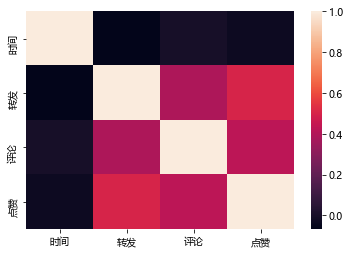

In [14]:
sns.heatmap(data.corr())

In [15]:
data.corr()

,时间,转发,评论,点赞
时间,1.000000,-0.065382,-0.002873,-0.029293
转发,-0.065382,1.000000,0.390209,0.502363
评论,-0.002873,0.390209,1.000000,0.426120
点赞,-0.029293,0.502363,0.426120,1.000000


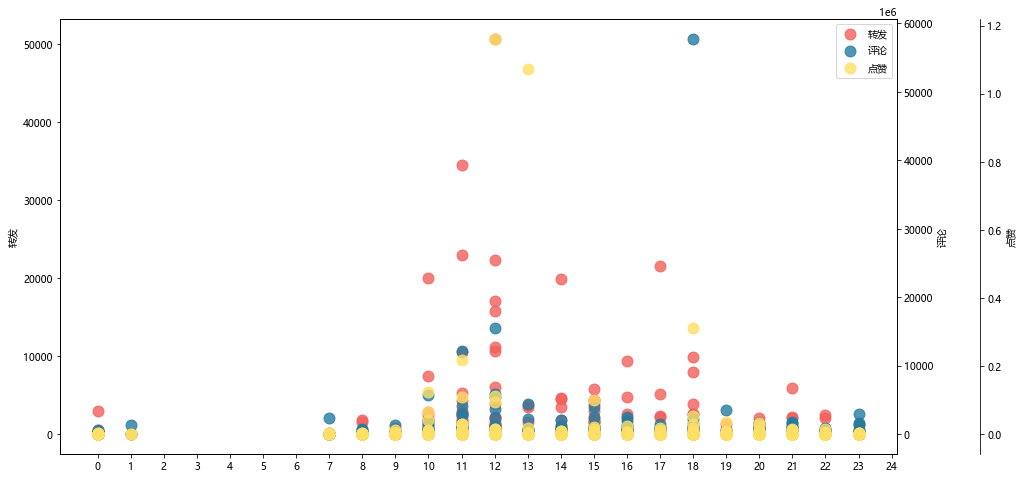

<Figure size 432x288 with 0 Axes>

In [16]:
fig,axes = plt.subplots(1,1,figsize=(15,8))
axes_reweibo = axes
axes_comment = axes.twinx()
axes_thumb = axes.twinx()
axes_thumb.spines["right"].set_position(("axes",1.1))

L1 = axes_reweibo.scatter(data["时间"].to_numpy(), data["转发"].to_numpy(),label = "转发",color="#F25F5C",alpha = 0.8,s=120)
L2 = axes_comment.scatter(data["时间"].to_numpy(), data["评论"].to_numpy(),label = "评论",color="#247BA0",alpha = 0.8,s=120)
L3 = axes_thumb.scatter(data["时间"].to_numpy(), data["点赞"].to_numpy(),label = "点赞",color="#FFE066",alpha = 0.8,s=120)
axes_reweibo.set_ylabel("转发")
axes_comment.set_ylabel("评论")
axes_thumb.set_ylabel("点赞")
plt.xticks(np.arange(0,25,1.0))
plt.xlabel("时间")
plt.legend([L1,L2,L3],[l.get_label()for l in [L1,L2,L3]],loc="best")
plt.show()
plt.savefig('step4v1_2.png')

# 词频分析

In [17]:
def word_cleaning(content):
    content = re.sub(r"@[\u4e00-\u9fff0-9a-zA-Z_]*\s", "", content)
    content = re.sub(r"[^\u4e00-\u9fff]", "", content)
    
    return content

In [18]:
t = word_cleaning(tempfile["内容0"][10])

In [19]:
tempfile["内容0"][0]

'时代少年团超话 2035是这young 带着对2035年的期待 把奋斗当做信仰 一起书写未来的华章 @时代少年团 L时代少年团 2035是这young 官方MV'

In [20]:
t

'王者荣耀限制老年人充值从月日开始我们将王者荣耀与和平精英作为试点推出了岁及以上玩家在个自然月内充值元后每次充值都需要人脸识别的功能初衷是为了防止未成年人冒用大龄用户帐号绕过游戏防沉迷限制且后续该功能也会在其他游戏陆续上线然而游戏里确实有一批岁以上的真实用户考虑到这种情况官方无法做到一刀切所以只能通过甄别限制无论如何再次对被误伤的老玩家们道歉'

In [21]:
stopwords = [line.strip() for line in open("stopwords-zh.txt", encoding="UTF-8").readlines()]

In [22]:
" ".join(list(filter(lambda x : x not in stopwords, jieba.lcut(t))))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\TIANYI\AppData\Local\Temp\jieba.cache
Loading model cost 0.783 seconds.
Prefix dict has been built successfully.


'王者 荣耀 限制 老年人 充值 王者 荣耀 和平 精英 试点 推出 岁 玩家 自然 充值 元后 每次 充值 需要 人脸识别 功能 初衷 防止 未成年人 冒用 大龄 用户 帐号 绕过 游戏 防沉迷 限制 后续 功能 游戏 陆续 上线 游戏 里 确实 一批 岁 真实 用户 考虑 这种 情况 官方 无法 做到 一刀切 只能 甄别 限制 无论如何 再次 误伤 老 玩家 道歉'

In [23]:
mask = Image.open("qq2.png")
mask = ~np.array(mask)

In [24]:
wc = WordCloud(font_path=r"C:\Windows\Fonts\msyh.ttc", mask=mask).generate(" ".join(list(filter(lambda x : x not in stopwords, jieba.lcut(t)))))

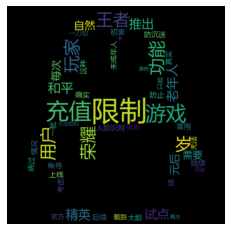

In [25]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
def make_wordCloud(tempfile):
    stopwords = [line.strip() for line in open("stopwords-zh.txt", encoding="UTF-8").readlines()]
    new = ""
    counter = 0
    for index,row in tempfile.iterrows():
        for i in range(40):
            content = row["内容"+str(i)]
            if pd.isnull(content): continue
            counter += 1
            new += word_cleaning(content)
    new = " ".join(list(filter(lambda x : x not in stopwords, jieba.lcut(new))))
    w_frequency = {}
    for word in new.split(" "):
        if word in w_frequency.keys():
            w_frequency[word]+=1
        else:
            w_frequency[word]= 1
    mask = Image.open("qq2.png")
    mask = ~np.array(mask)
    wc = WordCloud(
        font_path=r"C:\Windows\Fonts\msyh.ttc",
        mask=mask,
        background_color = "white",
        max_font_size=80,
        max_words=2000
    ).generate_from_frequencies(w_frequency)
    return wc,w_frequency,counter

In [37]:
wc , w_frequency,counter = make_wordCloud(tempfile)

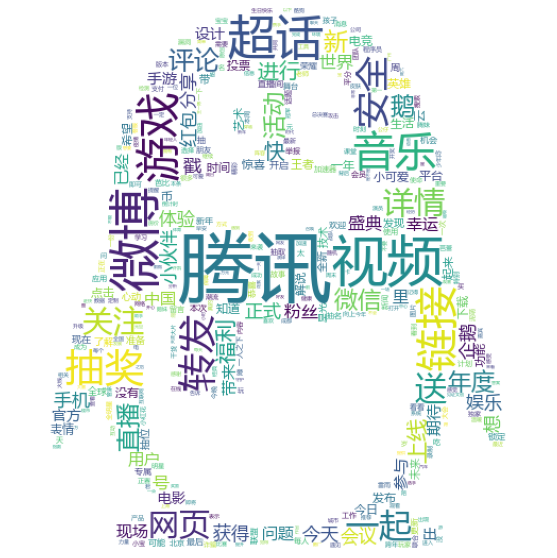

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()
plt.savefig('step2v1_3.png')

In [35]:
w_frequency

{'时代': 27,
 '少年': 31,
 '团超话': 2,
 '带': 64,
 '期待': 82,
 '奋斗': 10,
 '当做': 3,
 '信仰': 2,
 '一起': 218,
 '书写': 3,
 '未来': 65,
 '华章': 2,
 '团是': 2,
 '官方': 82,
 '敲娱': 1,
 '直播间': 61,
 '惊喜': 69,
 '上线': 140,
 '小鹅邀': 1,
 '云': 68,
 '看剧': 1,
 '独家': 48,
 '直播': 173,
 '北京电影学院': 1,
 '级': 14,
 '表演': 15,
 '本科': 1,
 '戏剧': 15,
 '班': 8,
 '毕业': 6,
 '大戏': 9,
 '大宅门': 2,
 '日月': 15,
 '每晚': 4,
 '直击': 4,
 '精彩': 42,
 '郝富': 1,
 '申超话': 1,
 '王俊凯': 19,
 '超话': 363,
 '王子': 14,
 '奇超话': 1,
 '优秀': 9,
 '准': 2,
 '毕业生': 3,
 '用心': 7,
 '呈现': 19,
 '百年': 2,
 '风云': 1,
 '不见不散': 26,
 '腾讯': 1061,
 '视频': 478,
 '搜索': 40,
 '账号': 10,
 '明星': 47,
 '舞台剧': 1,
 '校园': 13,
 '限定': 13,
 '观看': 31,
 '扫黑': 7,
 '风暴': 13,
 '预告': 25,
 '杀青': 3,
 '领衔主演': 4,
 '主演': 14,
 '特别': 43,
 '出演': 3,
 '电视剧': 10,
 '发布': 74,
 '特辑': 18,
 '还原': 13,
 '真实': 20,
 '案件': 3,
 '历程': 2,
 '品质': 5,
 '导演': 10,
 '实力': 25,
 '主创': 2,
 '强强联合': 1,
 '打磨': 5,
 '精品': 9,
 '传递': 10,
 '正义': 21,
 '力量': 34,
 '高能': 18,
 '来袭': 47,
 '全网': 11,
 '独播': 5,
 '敬请期待': 19,
 '孙红雷': 1,
 '张艺兴': 9,
 '刘奕君': 1,
 '组

In [38]:
counter

1842

In [30]:
import operator
#sorted_d = sorted(w_frequency.items(), key=operator.itemgetter(1))
sorted_d = dict( sorted(w_frequency.items(), key=operator.itemgetter(1),reverse=True))

In [31]:
sorted_d

{'腾讯': 1061,
 '视频': 478,
 '微博': 425,
 '超话': 363,
 '游戏': 322,
 '链接': 295,
 '音乐': 287,
 '抽奖': 262,
 '转发': 254,
 '安全': 219,
 '一起': 218,
 '送': 208,
 '关注': 200,
 '网页': 198,
 '详情': 193,
 '评论': 186,
 '直播': 173,
 '新': 172,
 '鹅': 171,
 '年度': 162,
 '微信': 156,
 '活动': 150,
 '福利': 142,
 '上线': 140,
 '进行': 139,
 '快': 137,
 '今天': 136,
 '获得': 129,
 '戳': 126,
 '红包': 125,
 '娱乐': 124,
 '手机': 123,
 '会议': 122,
 '体验': 121,
 '分享': 116,
 '企鹅': 114,
 '想': 113,
 '正式': 111,
 '小伙伴': 108,
 '盛典': 107,
 '粉丝': 105,
 '世界': 104,
 '号': 100,
 '中国': 100,
 '现场': 97,
 '里': 94,
 '问题': 94,
 '用户': 92,
 '参与': 91,
 '幸运': 91,
 '带来': 88,
 '已经': 84,
 '期待': 82,
 '官方': 82,
 '出': 81,
 '设计': 80,
 '手游': 80,
 '电影': 79,
 '小可爱': 78,
 '英雄': 78,
 '点击': 78,
 '时间': 77,
 '平台': 77,
 '知道': 76,
 '投票': 76,
 '一年': 75,
 '电竞': 75,
 '发布': 74,
 '今日': 74,
 '没有': 73,
 '表情': 72,
 '下载': 72,
 '王者': 71,
 '生活': 70,
 '起来': 70,
 '艺术': 70,
 '惊喜': 69,
 '希望': 69,
 '币': 69,
 '云': 68,
 '解说': 68,
 '功能': 67,
 '发现': 66,
 '未来': 65,
 '全新': 65,
 '带': 64,
 '技术': 64,
 '抽位': 6